# Packing

In [90]:
# Converts a number to the number the graycode represents 
def graycode_equivalent(num):
    return num ^ (num >> 1)

# Converts a number to a binary string of bits length 
# Only works for bits < 10
def graycode(num, bits):
    graycode = graycode_equivalent(num)
    bit_str = '0' + str(bits) + 'b' 
    binary_str = format(graycode, bit_str)
    return binary_str


def compress(number: float, lowerlim: float, upperlim: float, bits: int, gain: int):
    if number < lowerlim:
        number = lowerlim
    elif number > upperlim:
        number = upperlim

    percent = (number - lowerlim)/(upperlim - lowerlim)

    finalNumber = round(percent*(2**bits-1)*gain)
    #if finalNumber < 0:
    #    finalNumber = 0
    return finalNumber

ll = 50
ul = 100
b = 4
g = 1
reading = 100

c = compress(reading, ll, ul, b, g)
stream = graycode(c, b)
print(c)
print(stream)
print(graycode_equivalent(14))

15
1000
9


# Unpacking


In [82]:
def gray_to_int(gray_code):
    binary_code = gray_code[0]
    for i in range(1, len(gray_code)):
        if gray_code[i] == '1':
            binary_code += '1' if binary_code[i-1] == '0' else '0'
        else:
            binary_code += binary_code[i-1]
    return int(binary_code, 2)



def unpack(number: str, lowerlim: float, upperlim: float, bits: int, gain: int):
    number_int = gray_to_int(number)

    percent = number_int/(2**bits-1)
    value = (lowerlim + percent*(upperlim - lowerlim))/gain
    return value
print(unpack(stream,ll,ul,4,1))

100.0


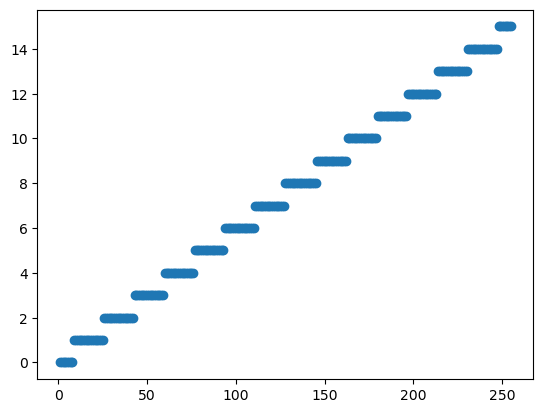

In [83]:
import matplotlib.pyplot as plt

number_list = []
compress_list = []
n = 16**2

for i in range(n):
    number_list.append(i)
    compress_list.append(compress(i,0,n,4,1))

del number_list[0]
del compress_list[0]

plt.scatter(number_list,compress_list)
plt.show()